## Link Video

### https://drive.google.com/drive/folders/1v1En2xqdBHOVpnJODKBRemMxlZTXfk8y?usp=sharing

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Read Dataset

In [2]:
df = pd.read_csv('AP004.csv')
df

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,...,30.30,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,...,30.00,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,...,29.85,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,...,29.25,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,...,28.05,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48797,2023-03-31 19:00:00,2023-03-31 20:00:00,10.75,29.25,2.98,8.18,6.77,6.10,8.90,0.50,...,NaN,67.00,4.97,186.25,3.00,751.75,0.06,33.58,0.00,0.53
48798,2023-03-31 20:00:00,2023-03-31 21:00:00,9.75,28.75,3.15,9.88,7.77,6.10,10.43,0.68,...,NaN,70.75,3.70,162.75,3.00,752.00,0.07,32.52,0.00,0.50
48799,2023-03-31 21:00:00,2023-03-31 22:00:00,16.75,33.75,2.95,14.32,10.00,7.90,12.17,0.86,...,NaN,73.25,3.33,128.75,3.00,752.50,0.07,31.20,0.00,0.75
48800,2023-03-31 22:00:00,2023-03-31 23:00:00,12.75,34.75,1.98,13.60,8.80,10.12,18.57,0.76,...,NaN,75.00,3.55,120.25,3.50,753.00,0.06,30.85,0.00,0.70


In [3]:
df.shape

(48802, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48802 entries, 0 to 48801
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   From Date            48802 non-null  object 
 1   To Date              48802 non-null  object 
 2   PM2.5 (ug/m3)        46344 non-null  float64
 3   PM10 (ug/m3)         46917 non-null  float64
 4   NO (ug/m3)           47244 non-null  float64
 5   NO2 (ug/m3)          47224 non-null  float64
 6   NOx (ppb)            46628 non-null  float64
 7   NH3 (ug/m3)          47140 non-null  float64
 8   SO2 (ug/m3)          46649 non-null  float64
 9   CO (mg/m3)           46387 non-null  float64
 10  Ozone (ug/m3)        47156 non-null  float64
 11  Benzene (ug/m3)      46914 non-null  float64
 12  Toluene (ug/m3)      46908 non-null  float64
 13  Eth-Benzene (ug/m3)  23988 non-null  float64
 14  MP-Xylene (ug/m3)    39256 non-null  float64
 15  Temp (degree C)      21599 non-null 

we found 2 categorical and the other is float

# Convert date column to datetime

In [5]:
df['From Date'] = pd.to_datetime(df['From Date'], format='%Y-%m-%d %H:%M:%S')

In [6]:
df = df.sort_values(by='From Date')

# EDA

In [7]:
category= []
numerical= []

for i in df.columns:
  if 'int'in str(df[i].dtype) or 'float' in str(df[i].astype):
    numerical.append(i)
  elif 'object'in str(df[i].dtype) :
    category.append(i)

print(f'Categorial Columns: {category}')
print(f'Numerical Columns: {numerical}')

Categorial Columns: ['To Date']
Numerical Columns: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']


In [8]:
df[numerical].describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,46344.000000,46917.000000,47244.000000,47224.000000,46628.000000,47140.000000,46649.000000,46387.000000,47156.000000,46914.000000,...,21599.000000,47364.000000,47375.000000,47373.000000,47146.000000,47373.000000,47176.000000,47286.000000,47510.000000,47075.000000
mean,34.821967,71.598595,2.509505,15.284711,10.025558,13.382927,8.498869,0.693976,40.931671,0.570979,...,28.862483,69.547402,2.758707,184.428806,193.844929,752.029991,0.006144,28.083312,0.037863,0.733060
std,30.785200,48.312579,5.058787,10.415231,7.179902,7.847778,6.086666,0.437964,32.651348,0.800774,...,1.844666,14.900450,1.441744,65.375666,191.882654,5.047151,0.092525,4.458718,0.444720,1.302384
min,0.250000,0.250000,0.030000,0.100000,0.000000,0.100000,0.100000,0.000000,0.200000,0.000000,...,7.700000,15.000000,0.200000,45.330000,0.000000,736.500000,-0.280000,4.500000,0.000000,0.000000
25%,12.000000,34.500000,1.450000,8.450000,6.000000,8.200000,4.920000,0.430000,14.730000,0.100000,...,27.950000,59.250000,1.620000,123.750000,3.500000,748.000000,-0.020000,25.170000,0.000000,0.100000
50%,25.000000,59.750000,1.900000,12.800000,8.470000,11.900000,7.250000,0.630000,33.230000,0.350000,...,28.750000,72.750000,2.550000,187.750000,111.750000,752.500000,0.000000,28.270000,0.000000,0.330000
75%,51.250000,100.500000,2.600000,19.300000,12.150000,17.000000,10.370000,0.880000,59.680000,0.830000,...,29.820000,81.250000,3.670000,240.500000,402.250000,756.000000,0.040000,31.050000,0.000000,0.800000
max,723.000000,835.500000,216.170000,166.250000,166.000000,118.250000,183.300000,18.690000,198.400000,50.900000,...,54.700000,100.000000,45.900000,326.000000,455.750000,808.250000,15.000000,45.850000,42.200000,64.020000


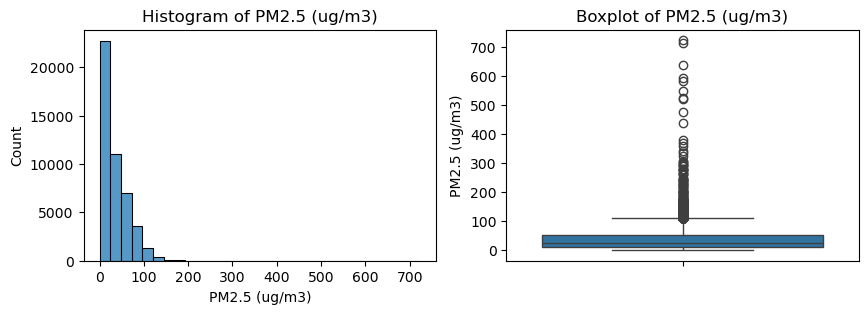

PM2.5 (ug/m3)- skewness: 2.6793738166313483
PM2.5 (ug/m3)- kurtosis: 27.93893719392045


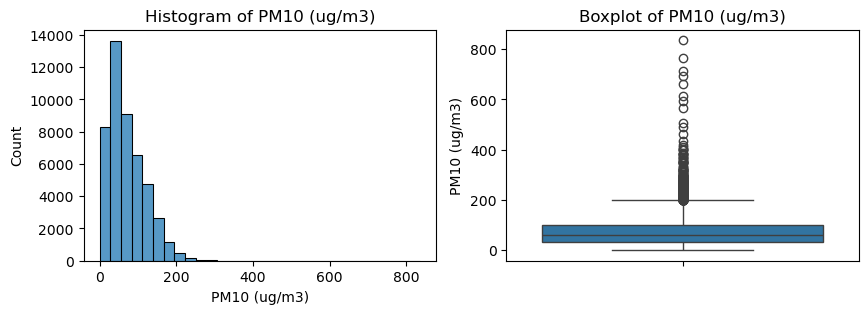

PM10 (ug/m3)- skewness: 1.4340834783193601
PM10 (ug/m3)- kurtosis: 6.465118620023276


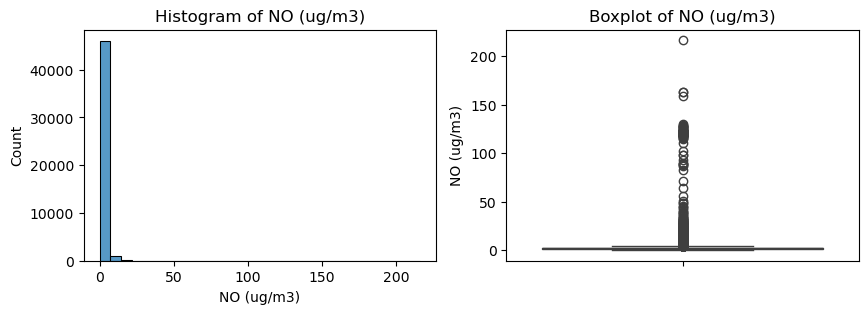

NO (ug/m3)- skewness: 21.029569837277414
NO (ug/m3)- kurtosis: 521.2975017937874


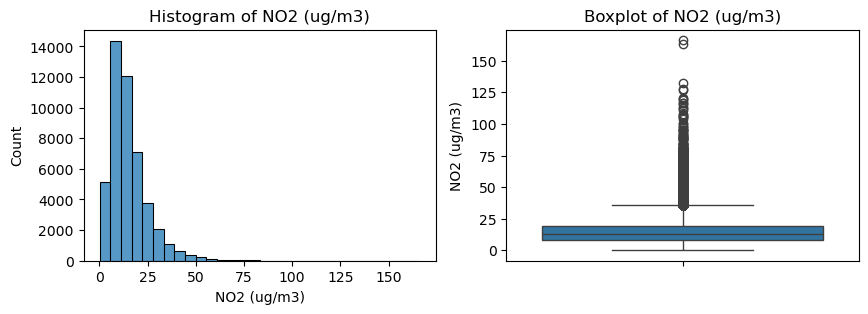

NO2 (ug/m3)- skewness: 2.2747654787963114
NO2 (ug/m3)- kurtosis: 10.673866464295585


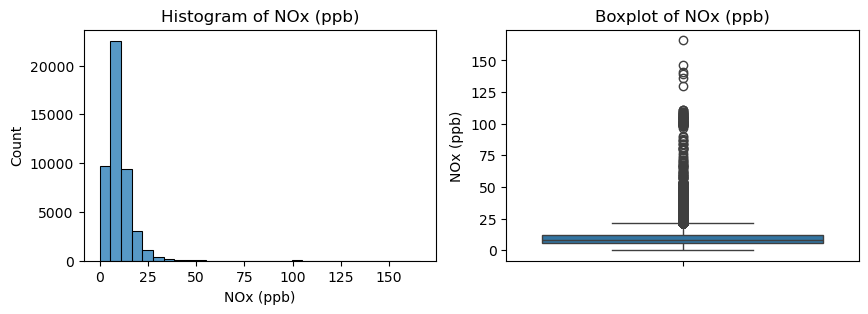

NOx (ppb)- skewness: 5.418381007037878
NOx (ppb)- kurtosis: 60.92075455791434


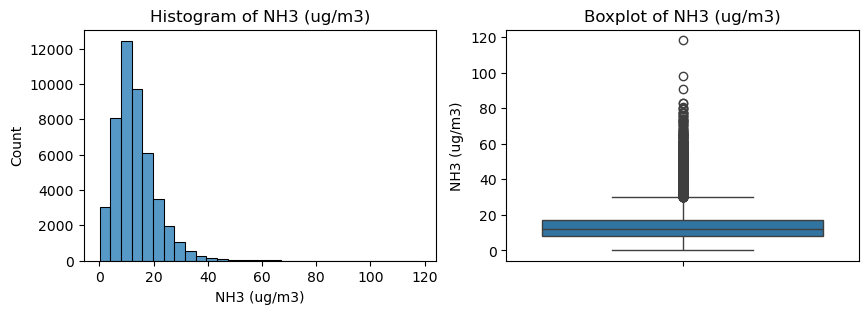

NH3 (ug/m3)- skewness: 1.7648936250710854
NH3 (ug/m3)- kurtosis: 7.148417329978384


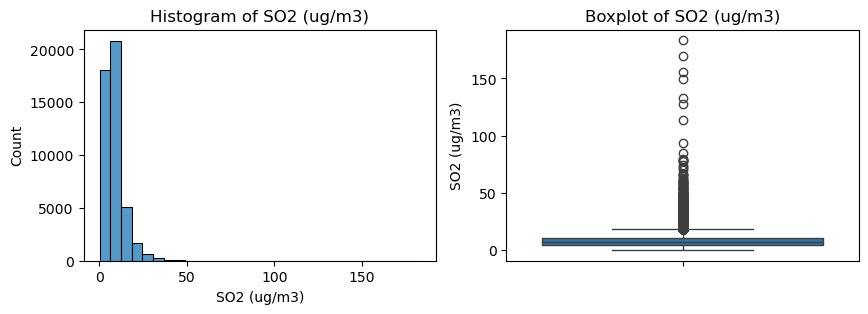

SO2 (ug/m3)- skewness: 4.233689700181873
SO2 (ug/m3)- kurtosis: 58.96204398921489


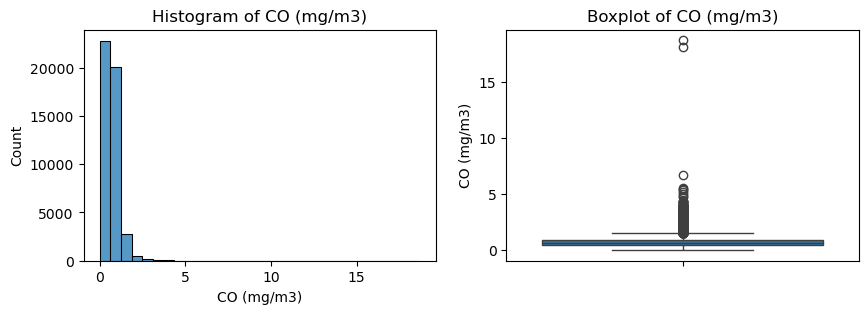

CO (mg/m3)- skewness: 4.802395142861718
CO (mg/m3)- kurtosis: 124.64404879134308


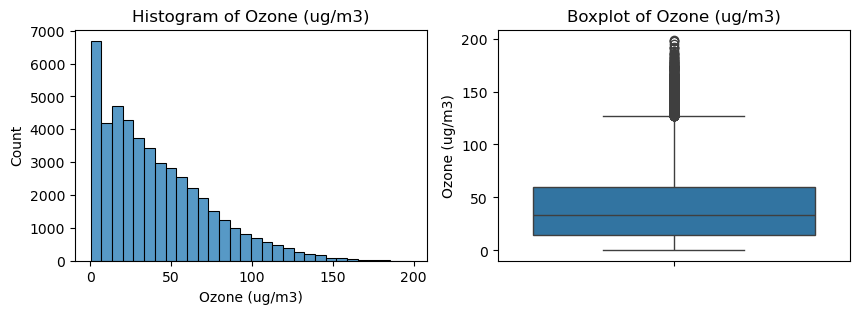

Ozone (ug/m3)- skewness: 1.0660100093874267
Ozone (ug/m3)- kurtosis: 0.8548360076736543


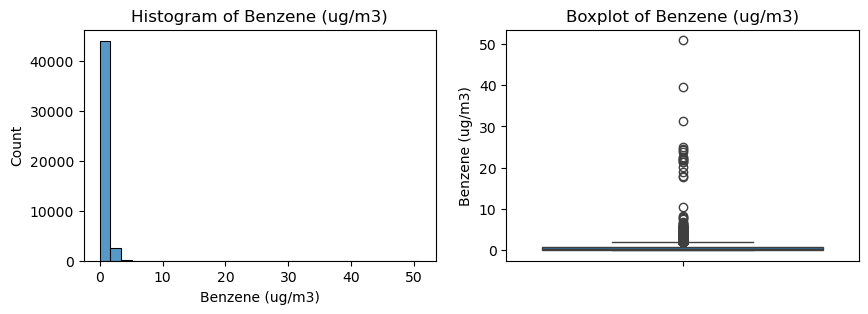

Benzene (ug/m3)- skewness: 16.061884826221167
Benzene (ug/m3)- kurtosis: 665.7025838131431


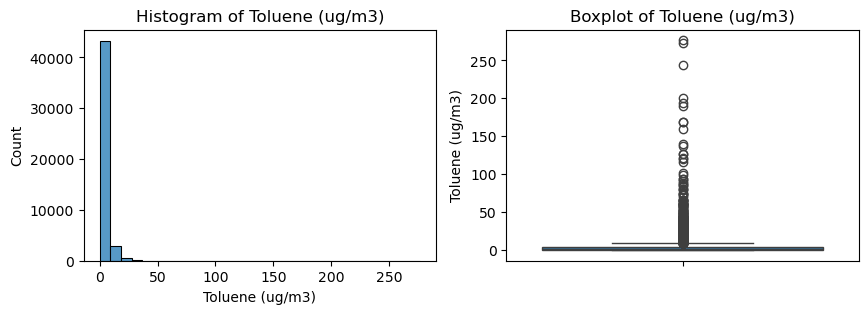

Toluene (ug/m3)- skewness: 14.523730259707175
Toluene (ug/m3)- kurtosis: 468.4836694375423


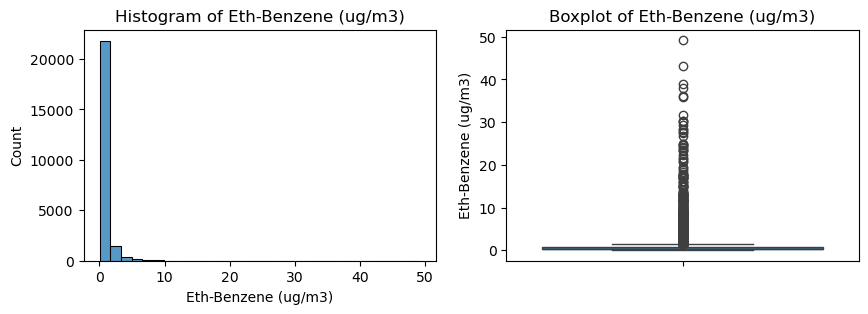

Eth-Benzene (ug/m3)- skewness: 11.053247592195891
Eth-Benzene (ug/m3)- kurtosis: 195.7636910130854


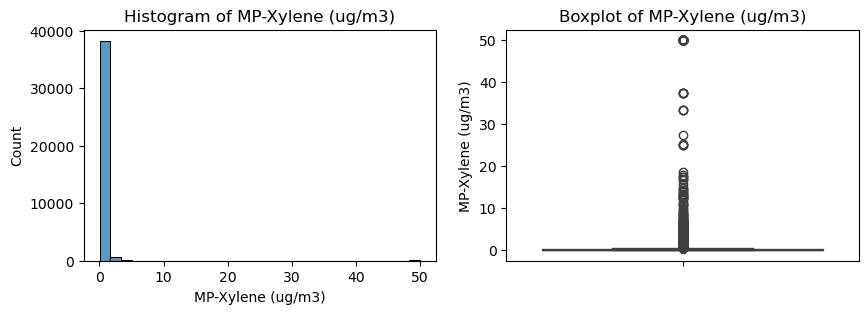

MP-Xylene (ug/m3)- skewness: 19.358976845098184
MP-Xylene (ug/m3)- kurtosis: 397.2977646669832


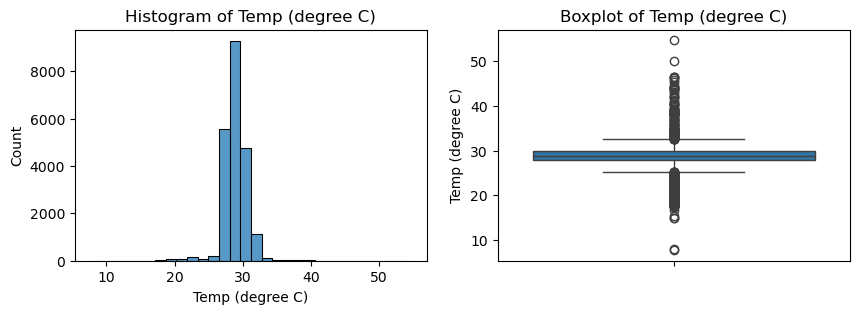

Temp (degree C)- skewness: -0.3116664252884092
Temp (degree C)- kurtosis: 16.053458730873157


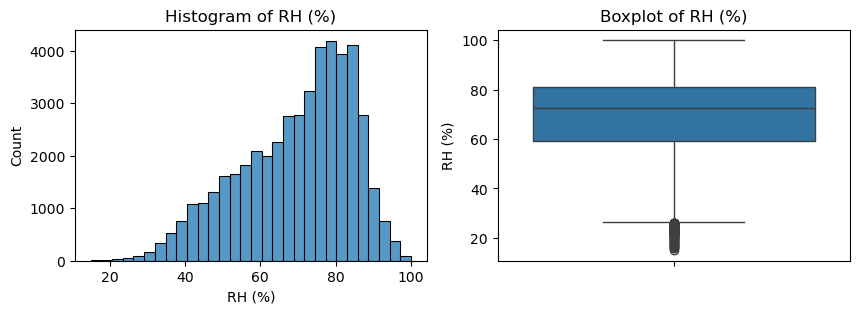

RH (%)- skewness: -0.6113444633948016
RH (%)- kurtosis: -0.3688411224840098


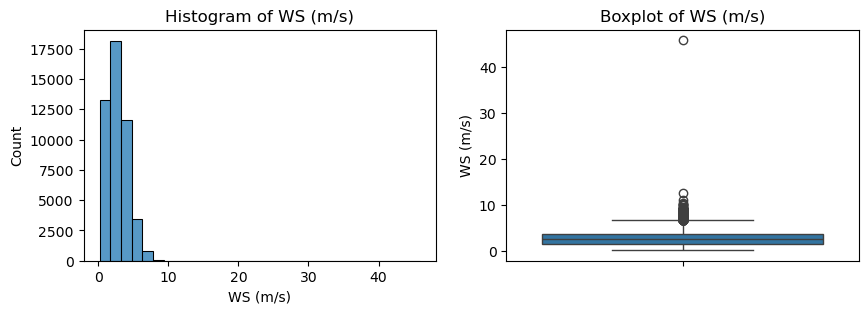

WS (m/s)- skewness: 1.309504056610714
WS (m/s)- kurtosis: 17.301754332941307


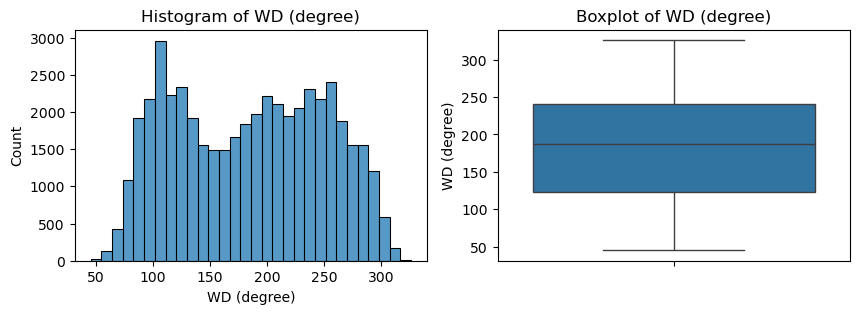

WD (degree)- skewness: 0.00458797989758055
WD (degree)- kurtosis: -1.2193853438601645


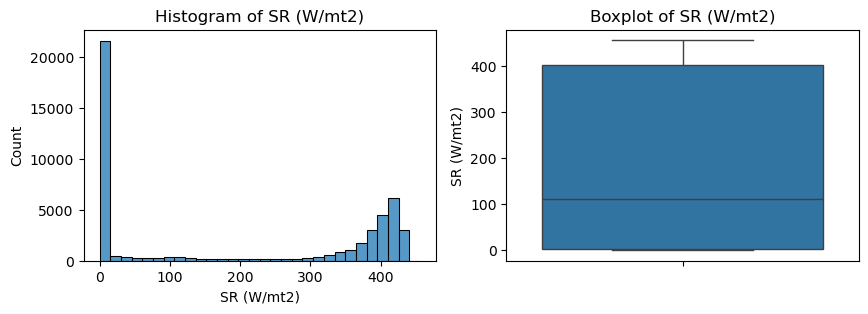

SR (W/mt2)- skewness: 0.11619422556208797
SR (W/mt2)- kurtosis: -1.8982926824201378


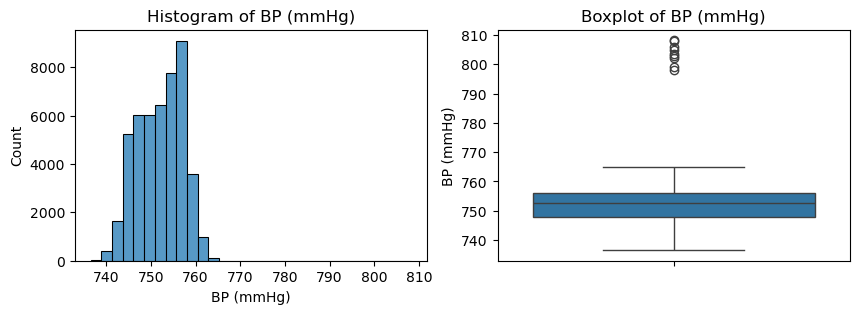

BP (mmHg)- skewness: 0.037980689855938325
BP (mmHg)- kurtosis: 1.15557270717696


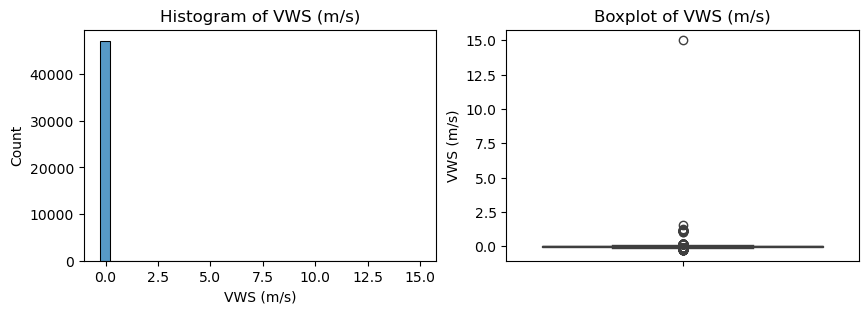

VWS (m/s)- skewness: 90.83819606853292
VWS (m/s)- kurtosis: 14626.88735815379


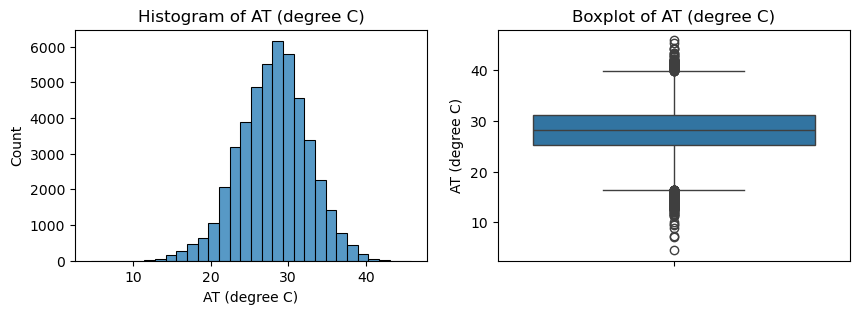

AT (degree C)- skewness: -0.16938815427451256
AT (degree C)- kurtosis: 0.17797051303488054


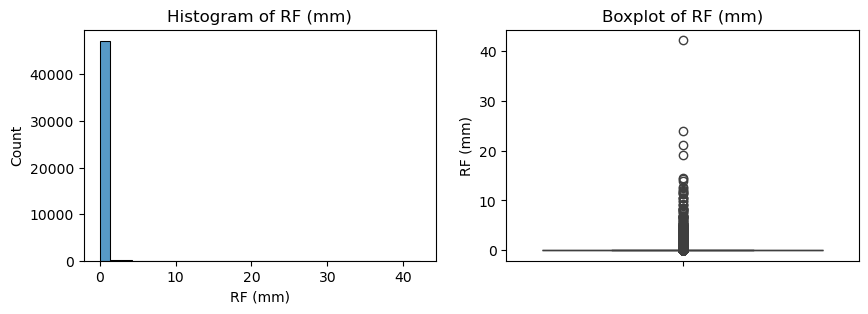

RF (mm)- skewness: 36.25278973226556
RF (mm)- kurtosis: 2297.1288660074856


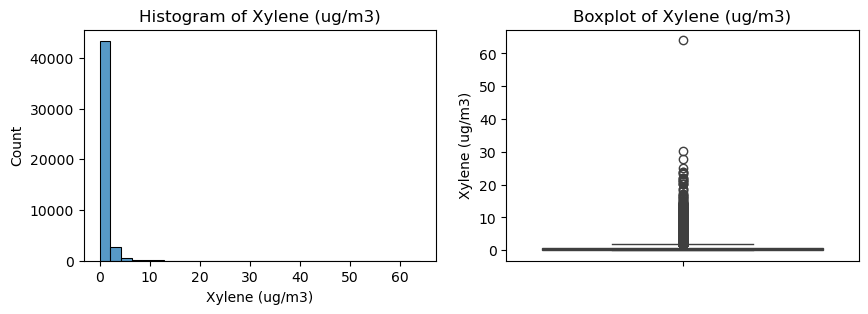

Xylene (ug/m3)- skewness: 7.892622657565698
Xylene (ug/m3)- kurtosis: 174.81031692679807


In [9]:
def dist_plot(df, numerical_cols):
  for i in numerical_cols:
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=30)
    plt.title(f"Histogram of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")

    plt.show()

    print(f"{i}- skewness: {df[i].skew()}")
    print(f"{i}- kurtosis: {df[i].kurt()}")

dist_plot(df[numerical],numerical)

overall all the data is skewed and not normally distributed later on we will scale it using several option of scaler such as standard scaler, min-max, or even robust scaler. But generally it is better to use min-max scaler for lstm model (pattern time series)

# Preprocessing

## Drop "To Date" and "From Date" column

In [10]:
df.drop('To Date', axis=1, inplace=True)
df.drop('From Date', axis=1, inplace=True)
df

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,...,30.30,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
1,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,...,30.00,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,...,29.85,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
3,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,...,29.25,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
4,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,...,28.05,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48797,10.75,29.25,2.98,8.18,6.77,6.10,8.90,0.50,7.12,0.43,...,NaN,67.00,4.97,186.25,3.00,751.75,0.06,33.58,0.00,0.53
48798,9.75,28.75,3.15,9.88,7.77,6.10,10.43,0.68,7.28,0.57,...,NaN,70.75,3.70,162.75,3.00,752.00,0.07,32.52,0.00,0.50
48799,16.75,33.75,2.95,14.32,10.00,7.90,12.17,0.86,7.05,0.83,...,NaN,73.25,3.33,128.75,3.00,752.50,0.07,31.20,0.00,0.75
48800,12.75,34.75,1.98,13.60,8.80,10.12,18.57,0.76,7.02,1.43,...,NaN,75.00,3.55,120.25,3.50,753.00,0.06,30.85,0.00,0.70


## Handling Missing Values

In [11]:
df.isna().sum()

PM2.5 (ug/m3)           2458
PM10 (ug/m3)            1885
NO (ug/m3)              1558
NO2 (ug/m3)             1578
NOx (ppb)               2174
NH3 (ug/m3)             1662
SO2 (ug/m3)             2153
CO (mg/m3)              2415
Ozone (ug/m3)           1646
Benzene (ug/m3)         1888
Toluene (ug/m3)         1894
Eth-Benzene (ug/m3)    24814
MP-Xylene (ug/m3)       9546
Temp (degree C)        27203
RH (%)                  1438
WS (m/s)                1427
WD (degree)             1429
SR (W/mt2)              1656
BP (mmHg)               1429
VWS (m/s)               1626
AT (degree C)           1516
RF (mm)                 1292
Xylene (ug/m3)          1727
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48802 entries, 0 to 48801
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PM2.5 (ug/m3)        46344 non-null  float64
 1   PM10 (ug/m3)         46917 non-null  float64
 2   NO (ug/m3)           47244 non-null  float64
 3   NO2 (ug/m3)          47224 non-null  float64
 4   NOx (ppb)            46628 non-null  float64
 5   NH3 (ug/m3)          47140 non-null  float64
 6   SO2 (ug/m3)          46649 non-null  float64
 7   CO (mg/m3)           46387 non-null  float64
 8   Ozone (ug/m3)        47156 non-null  float64
 9   Benzene (ug/m3)      46914 non-null  float64
 10  Toluene (ug/m3)      46908 non-null  float64
 11  Eth-Benzene (ug/m3)  23988 non-null  float64
 12  MP-Xylene (ug/m3)    39256 non-null  float64
 13  Temp (degree C)      21599 non-null  float64
 14  RH (%)               47364 non-null  float64
 15  WS (m/s)             47375 non-null 

## Handling Missing Values

In [13]:
def process_missing_values_inplace(df, numerical, small_gap=2, medium_gap=10, n_neighbors=5):
    all_gaps = []
    
    for col in numerical:
        missing_positions = df[col].isnull()
        gap_groups = (missing_positions != missing_positions.shift()).cumsum()
        df[f'{col}_gap_group'] = gap_groups.where(missing_positions)

        gap_ids = df[f'{col}_gap_group'].dropna().unique()

        for gap_id in gap_ids:
            gap_rows = df[df[f'{col}_gap_group'] == gap_id]
            gap_size = len(gap_rows)
            gap_start = gap_rows.index.min()
            gap_end = gap_rows.index.max()

            all_gaps.append({
                'Column': col,
                'Gap ID': f'Gap_{int(gap_id)}',
                'Start Row': gap_start,
                'End Row': gap_end,
                'Gap Size': gap_size
            })

            # 1-2 forward fill
            if gap_size <= small_gap:
                df.loc[gap_rows.index, col] = df[col].ffill().loc[gap_rows.index]

            # 3-10 interpolate
            elif small_gap < gap_size <= medium_gap:
                df[col] = df[col].interpolate(method='linear')

            # >10 knn imputer
            else:
                pass

    imputer = KNNImputer(n_neighbors=n_neighbors)
    df[numerical] = imputer.fit_transform(df[numerical])

    gap_summary_df = pd.DataFrame(all_gaps)
    
    gap_group_cols = [col for col in df.columns if '_gap_group' in col]
    df.drop(columns=gap_group_cols, inplace=True)

    return gap_summary_df


In [14]:
gap_summary = process_missing_values_inplace(df, numerical)

print(gap_summary.head())

          Column  Gap ID  Start Row  End Row  Gap Size
0  PM2.5 (ug/m3)   Gap_2        120      121         2
1  PM2.5 (ug/m3)   Gap_4        128      130         3
2  PM2.5 (ug/m3)   Gap_6        135      137         3
3  PM2.5 (ug/m3)   Gap_8        153      154         2
4  PM2.5 (ug/m3)  Gap_10        169      170         2


In [15]:
# check missing values after processing
print(df.isna().sum())

PM2.5 (ug/m3)          0
PM10 (ug/m3)           0
NO (ug/m3)             0
NO2 (ug/m3)            0
NOx (ppb)              0
NH3 (ug/m3)            0
SO2 (ug/m3)            0
CO (mg/m3)             0
Ozone (ug/m3)          0
Benzene (ug/m3)        0
Toluene (ug/m3)        0
Eth-Benzene (ug/m3)    0
MP-Xylene (ug/m3)      0
Temp (degree C)        0
RH (%)                 0
WS (m/s)               0
WD (degree)            0
SR (W/mt2)             0
BP (mmHg)              0
VWS (m/s)              0
AT (degree C)          0
RF (mm)                0
Xylene (ug/m3)         0
dtype: int64


# Handling Anomalies

In [16]:
# Check if there is negative value in each column
for i in df.select_dtypes(include='number').columns:
    print(f"{i}: {df[df[i] < 0].shape[0]}")

PM2.5 (ug/m3): 0
PM10 (ug/m3): 0
NO (ug/m3): 0
NO2 (ug/m3): 0
NOx (ppb): 0
NH3 (ug/m3): 0
SO2 (ug/m3): 0
CO (mg/m3): 0
Ozone (ug/m3): 0
Benzene (ug/m3): 0
Toluene (ug/m3): 0
Eth-Benzene (ug/m3): 0
MP-Xylene (ug/m3): 0
Temp (degree C): 0
RH (%): 0
WS (m/s): 0
WD (degree): 0
SR (W/mt2): 0
BP (mmHg): 0
VWS (m/s): 15880
AT (degree C): 0
RF (mm): 0
Xylene (ug/m3): 0


In [17]:
def clip_and_impute_negatives(df, numerical, n_neighbors=5, tolerance=0.0):
    clipped_info = []

    for col in numerical:
        negative_positions = df[col] < tolerance
        num_negatives = negative_positions.sum()

        if num_negatives > 0:
            print(f'{col} - Found {num_negatives} negative values. Setting to NaN for imputation.')
            clipped_info.append({'Column': col, 'Negatives Detected': num_negatives})
            df.loc[negative_positions, col] = np.nan  # Set negative values to NaN

    imputer = KNNImputer(n_neighbors=n_neighbors)
    df[numerical] = imputer.fit_transform(df[numerical])

    clipped_summary = pd.DataFrame(clipped_info)

    return clipped_summary

In [18]:
clipped_summary = clip_and_impute_negatives(df, numerical)

print(clipped_summary)

VWS (m/s) - Found 15880 negative values. Setting to NaN for imputation.
      Column  Negatives Detected
0  VWS (m/s)               15880


In [19]:
# Check if there is negative value in each column
for i in df.select_dtypes(include='number').columns:
    print(f"{i}: {df[df[i] < 0].shape[0]}")

PM2.5 (ug/m3): 0
PM10 (ug/m3): 0
NO (ug/m3): 0
NO2 (ug/m3): 0
NOx (ppb): 0
NH3 (ug/m3): 0
SO2 (ug/m3): 0
CO (mg/m3): 0
Ozone (ug/m3): 0
Benzene (ug/m3): 0
Toluene (ug/m3): 0
Eth-Benzene (ug/m3): 0
MP-Xylene (ug/m3): 0
Temp (degree C): 0
RH (%): 0
WS (m/s): 0
WD (degree): 0
SR (W/mt2): 0
BP (mmHg): 0
VWS (m/s): 0
AT (degree C): 0
RF (mm): 0
Xylene (ug/m3): 0


after we check the negative value, its look like the value under zero is not detected, perhaps we will need the value to be clip into zero and imput it using knn

## Scaling

In [20]:
# minmax
def scale_data(df, numerical_columns):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    scaled_df = pd.DataFrame(df, columns=numerical_columns, index=df.index)
    return scaled_df, scaler

# Windowing

In [21]:
def create_windows(data, target_column, window_size=5):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size].values)
        y.append(data.iloc[i+window_size][target_column])
    return np.array(X), np.array(y)

# Splitting

In [22]:
def split_dataset(X, y, train_size=0.8, val_size=0.1):
    total_samples = len(X)
    
    train_end = int(total_samples * train_size)
    val_end = int(total_samples * (train_size + val_size))
    
    X_train, y_train = X[:train_end], y[:train_end]
    X_val, y_val = X[train_end:val_end], y[train_end:val_end]
    X_test, y_test = X[val_end:], y[val_end:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [23]:
# run the functions
df, scaler = scale_data(df, numerical)

X, y = create_windows(df, target_column='AT (degree C)', window_size=5)

X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(X, y)

print(f'Train shape: {X_train.shape}')
print(f'Validation shape: {X_val.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (39037, 5, 23)
Validation shape: (4880, 5, 23)
Test shape: (4880, 5, 23)


# Baseline Model

In [24]:
def build_baseline_lstm(input_shape):
    base_model = Sequential()
    base_model.add(LSTM(10, input_shape=input_shape)) 
    base_model.add(Dense(1, activation='linear'))  
    base_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return base_model

In [25]:
input_shape = (X_train.shape[1], X_train.shape[2])

baseline_model = build_baseline_lstm(input_shape)

history_base = baseline_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/50


2025-06-24 16:42:35.607077: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-06-24 16:42:35.607106: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-06-24 16:42:35.607109: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-06-24 16:42:35.607126: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-24 16:42:35.607135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, 

1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0118 - val_loss: 0.0020
Epoch 2/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 3/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 11/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 12/50
1220/1220 ━━━━━━━━━━━━━━━━━━━

## Evaluate Base Model

### Function for Evaluate

In [26]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    y_true = y_true[non_zero_idx]
    y_pred = y_pred[non_zero_idx]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    non_zero_idx = denominator != 0
    y_true = y_true[non_zero_idx]
    y_pred = y_pred[non_zero_idx]
    denominator = denominator[non_zero_idx]
    return np.mean(np.abs(y_true - y_pred) / denominator) * 100

def evaluate_performance(y_true, y_pred, dataset_name='Dataset'):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y_true, y_pred)
    
    print(f'\nEvaluation on {dataset_name}:')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'sMAPE: {smape:.2f}%')
    
    return mae, mse, r2, mape, smape


In [27]:
y_pred_train_base = baseline_model.predict(X_train).flatten()
y_pred_val_base = baseline_model.predict(X_val).flatten()
y_pred_test_base = baseline_model.predict(X_test).flatten()
    
evaluate_performance(y_train, y_pred_train_base, 'Training Baseline Set')
evaluate_performance(y_val, y_pred_val_base, 'Validation Baseline Set')
evaluate_performance(y_test, y_pred_test_base, 'Test Baseline Set')

 108/1220 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

2025-06-24 16:49:23.066243: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation on Training Baseline Set:
MAE: 0.0226
MSE: 0.0013
R2 Score: 0.9722
MAPE: 57.34%
sMAPE: 25.43%

Evaluation on Validation Baseline Set:
MAE: 0.0257
MSE: 0.0012
R2 Score: 0.9721
MAPE: 46.13%
sMAPE: 17.72%

Evaluation on Test Baseline Set:
MAE: 0.0209
MSE: 0.0008
R2 Score: 0.9501
MAPE: 14.96%
sMAPE: 10.40%


(0.02089621816763524,
 0.0008217439357308974,
 0.9501460900078886,
 14.955068288913656,
 10.398428261610672)

berdasarkan hasil evaluasi base model sudah cukup baik dar segi sMAPE, mengapa menggunakan sMAPE? karena kita mengerjakan dataset pada bidang air quality yang dimana overall value dari 

## Plot Loss Curve

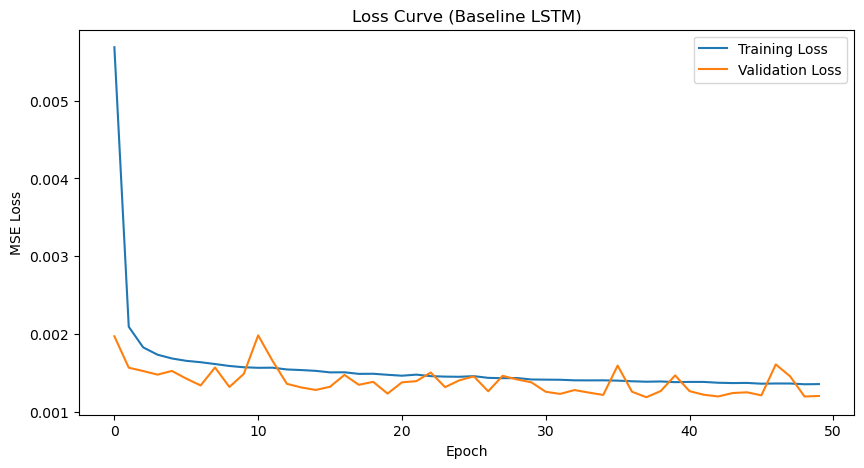

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve (Baseline LSTM)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

shows no signs of overfitting and underfiting that showed large gap between training and validation loss

# Modified Model 1

In [29]:
def build_modified_lstm_1(input_shape):
    modified_model_1 = Sequential()

    modified_model_1.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    modified_model_1.add(Dropout(0.3))
    
    modified_model_1.add(LSTM(units=32, return_sequences=False))
    modified_model_1.add(Dropout(0.3))
    
    modified_model_1.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=0.0005)  
    modified_model_1.compile(optimizer=optimizer, loss='mse')
    
    return modified_model_1

In [30]:
input_shape = (X_train.shape[1], X_train.shape[2])
modified_model_1 = build_modified_lstm_1(input_shape)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_modified_model_1.keras', monitor='val_loss', save_best_only=True, verbose=1)

history_mod_1 = modified_model_1.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182
Epoch 1: val_loss improved from inf to 0.00443, saving model to best_modified_model_1.keras
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0182 - val_loss: 0.0044
Epoch 2/50
1216/1220 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047
Epoch 2: val_loss improved from 0.00443 to 0.00185, saving model to best_modified_model_1.keras
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 3/50
1219/1220 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033
Epoch 3: val_loss improved from 0.00185 to 0.00169, saving model to best_modified_model_1.keras
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 4/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 4: val_loss did not improve from 0.00169
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 5/50
1218/1220 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027
Epoch 5: val_l

# Evaluation Modified Model

In [31]:
y_pred_train_mod_1 = modified_model_1.predict(X_train).flatten()
y_pred_val_mod_1 = modified_model_1.predict(X_val).flatten()
y_pred_test_mod_1 = modified_model_1.predict(X_test).flatten()

evaluate_performance(y_train, y_pred_train_mod_1, 'Training Modified Set 1)')
evaluate_performance(y_val, y_pred_val_mod_1, 'Validation Modified Set 1')
evaluate_performance(y_test, y_pred_test_mod_1, 'Test Modified Set 1')

  50/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step  

2025-06-24 16:51:52.436428: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Evaluation on Training Modified Set 1):
MAE: 0.0253
MSE: 0.0016
R2 Score: 0.9662
MAPE: 66.88%
sMAPE: 27.57%

Evaluation on Validation Modified Set 1:
MAE: 0.0274
MSE: 0.0014
R2 Score: 0.9680
MAPE: 56.25%
sMAPE: 18.72%

Evaluation on Test Modified Set 1:
MAE: 0.0197
MSE: 0.0007
R2 Score: 0.9553
MAPE: 14.52%
sMAPE: 9.67%


(0.019666693713170025,
 0.000736455727115527,
 0.9553203912601604,
 14.517079709935658,
 9.666736132254936)

## Plot Modified Model

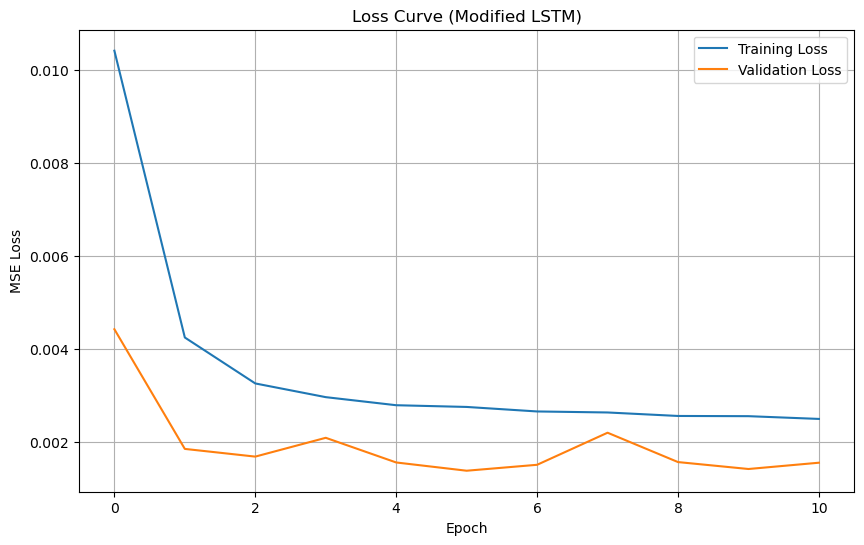

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(history_mod_1.history['loss'], label='Training Loss')
plt.plot(history_mod_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve (Modified LSTM)')
plt.legend()
plt.grid()
plt.show()

both losses remain low and consistent, slightly perform better than the baseline

# Modified Model 2

In [40]:
def build_modified_lstm_2(input_shape):
    modified_model_2 = Sequential()

    modified_model_2.add(LSTM(units=128, return_sequences=True, input_shape=input_shape))
    modified_model_2.add(LayerNormalization())
    modified_model_2.add(Dropout(0.5))

    modified_model_2.add(LSTM(units=64, return_sequences=False))
    modified_model_2.add(Dropout(0.4))

    modified_model_2.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=0.0003)
    modified_model_2.compile(optimizer=optimizer, loss='mse')

    return modified_model_2

In [41]:
input_shape = (X_train.shape[1], X_train.shape[2])
modified_model_2 = build_modified_lstm_2(input_shape)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_modified_model_2.keras', monitor='val_loss', save_best_only=True, verbose=1)

history_mod_2 = modified_model_2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-06-24 16:53:51.414900: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


610/610 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0807
Epoch 1: val_loss improved from inf to 0.00661, saving model to best_modified_model_2.keras
610/610 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0807 - val_loss: 0.0066
Epoch 2/50
609/610 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117
Epoch 2: val_loss improved from 0.00661 to 0.00477, saving model to best_modified_model_2.keras
610/610 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0117 - val_loss: 0.0048
Epoch 3/50
607/610 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085
Epoch 3: val_loss improved from 0.00477 to 0.00335, saving model to best_modified_model_2.keras
610/610 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0085 - val_loss: 0.0034
Epoch 4/50
607/610 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0067
Epoch 4: val_loss improved from 0.00335 to 0.00281, saving model to best_modified_model_2.keras
610/610 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 5/50
608/610 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step -

## Evaluate Modified Model 2

In [48]:
y_pred_train_mod_2 = modified_model_2.predict(X_train).flatten()
y_pred_val_mod_2 = modified_model_2.predict(X_val).flatten()
y_pred_test_mod_2 = modified_model_2.predict(X_test).flatten()

evaluate_performance(y_train, y_pred_train_mod_2, 'Training Modified Set 2')
evaluate_performance(y_val, y_pred_val_mod_2, 'Validation Modified Set 2')
evaluate_performance(y_test, y_pred_test_mod_2, 'Test Modified Set 2')

  23/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step    

2025-06-24 17:05:03.158736: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Evaluation on Training Modified Set 2:
MAE: 0.0246
MSE: 0.0015
R2 Score: 0.9681
MAPE: 63.05%
sMAPE: 27.28%

Evaluation on Validation Modified Set 2:
MAE: 0.0267
MSE: 0.0013
R2 Score: 0.9699
MAPE: 54.30%
sMAPE: 18.58%

Evaluation on Test Modified Set 2:
MAE: 0.0200
MSE: 0.0008
R2 Score: 0.9540
MAPE: 13.73%
sMAPE: 9.82%


(0.020032365387500202,
 0.0007588758335112261,
 0.9539601987261315,
 13.730596606905188,
 9.824248656209873)

## Plot Loss Modified Model 2

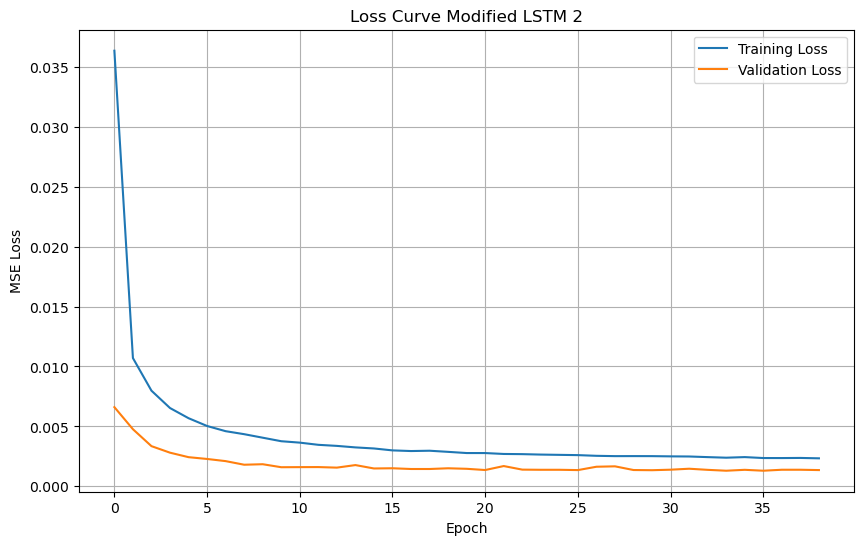

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(history_mod_2.history['loss'], label='Training Loss')
plt.plot(history_mod_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve Modified LSTM 2')
plt.legend()
plt.grid()
plt.show()

the second modified model perform better than the other model resulting excellent convergance and very low error

## Plot Line Prediction Vs Actual

In [54]:
def plot_combined_predictions(
    y_actual, y_pred_baseline, y_pred_mod1, y_pred_mod2,
    dataset_name='Dataset', start_row=0, end_row=100
):
    plt.figure(figsize=(15, 5))
    
    plt.plot(range(start_row, end_row), y_actual[start_row:end_row], label='Actual', color='blue')
    plt.plot(range(start_row, end_row), y_pred_baseline[start_row:end_row], label='Baseline Prediction', color='red')
    plt.plot(range(start_row, end_row), y_pred_mod1[start_row:end_row], label='Modified Model 1 Prediction', color='green')
    plt.plot(range(start_row, end_row), y_pred_mod2[start_row:end_row], label='Modified Model 2 Prediction', color='purple')
    
    plt.title(f'{dataset_name} Predictions (Rows {start_row} to {end_row})')
    plt.xlabel('Time Step')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.grid()
    plt.show()

## Prediction Vs Actual Plot

Plotting predictions for Baseline LSTM


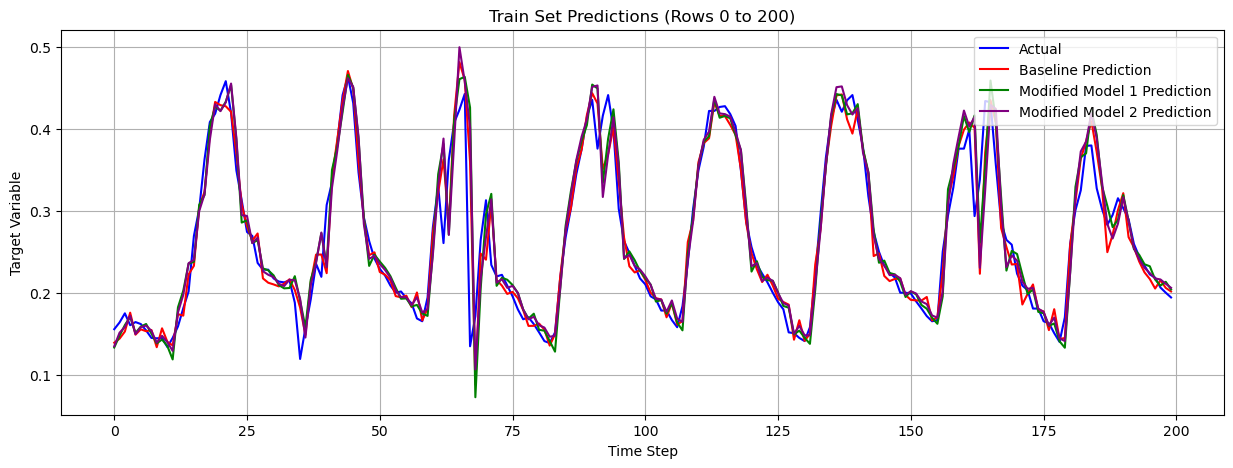

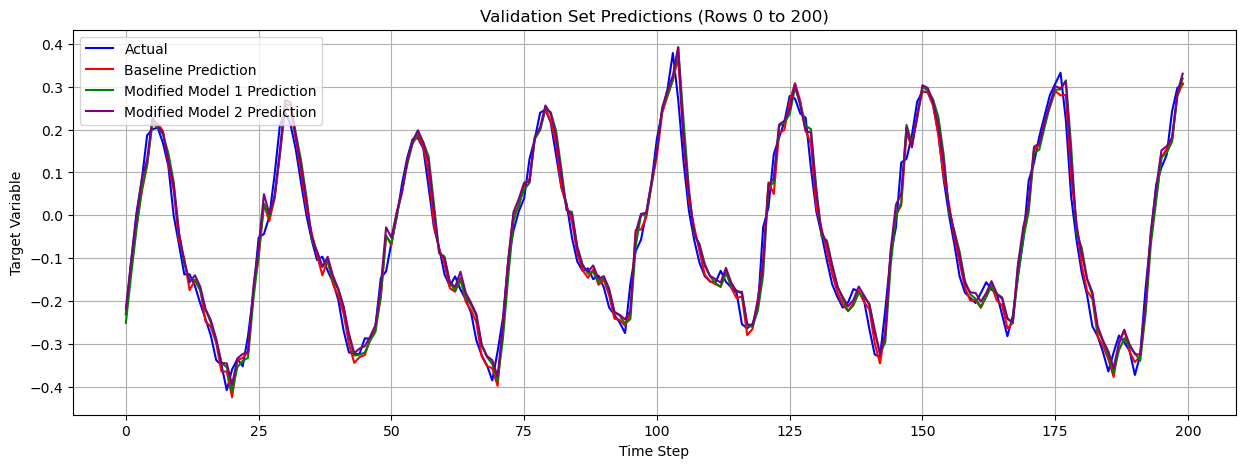

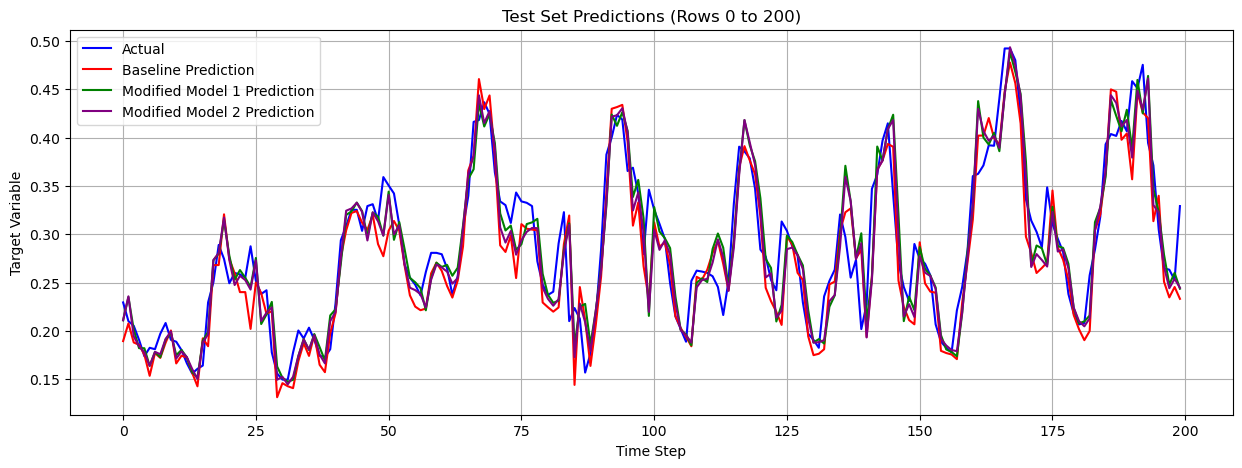

In [55]:
print("Plotting predictions for Baseline LSTM")
plot_combined_predictions(
    y_train, y_pred_train_base, y_pred_train_mod_1, y_pred_train_mod_2,
    dataset_name='Train Set', start_row=0, end_row=200
)

plot_combined_predictions(
    y_val, y_pred_val_base, y_pred_val_mod_1, y_pred_val_mod_2,
    dataset_name='Validation Set', start_row=0, end_row=200
)

plot_combined_predictions(
    y_test, y_pred_test_base, y_pred_test_mod_1, y_pred_test_mod_2,
    dataset_name='Test Set', start_row=0, end_row=200
)

## Pertanyaan Bonus

#### apakah problem ini mungkin menggunakan time seriesmultivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban anda untuk problem ini

Yes, the air quality prediction problem you're working on is highly suitable to be approached as a multivariate time series problem. A multivariate time series problem involves multiple variables (features) that change over time, where the goal is to predict a target variable based on the historical patterns of these multiple features. In your case, the dataset includes various environmental parameters such as PM2.5, PM10, NO₂, CO, temperature, humidity, wind speed, and more all of which are collected over time and are likely to influence each other. Since we have variable 'From Date' and 'To Date' and multiple related features, makes its ideal for multivariate time series modeling.